# Describing 3d Meshes by Example: Python+JS

In this tutorial, I explain how libraries like [matplotlib's plot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) or [plotly's](https://plot.ly/python/3d-surface-plots/) surface
consume and build render-ready surfaces.

Drag or rotate the cube below!

In [8]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)         # initiate notebook for offline plot
from plotly.graph_objs import Surface
import numpy as np
x = np.array([[.5, .5, .5, .5, .5],[0, 1, 1, 0, 0],[0, 1, 1, 0, 0],[.5, .5, .5, .5, .5],])
y = np.array([[.5, .5, .5, .5, .5],[0, 0, 1, 1, 0],[0, 0, 1, 1, 0],[.5, .5, .5, .5, .5],])
z = np.array([[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],])
cube = Surface(x=x,y=y,z=z, colorscale='Viridis')
iplot([cube])

## Dependencies

```bash
pip3 install plotly numpy matplotlib
```

## Source for Cube Above

In [10]:
%%capture
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)         # initiate notebook for offline plot
from plotly.graph_objs import Surface
import numpy as np
x = np.array([[.5, .5, .5, .5, .5],[0, 1, 1, 0, 0],[0, 1, 1, 0, 0],[.5, .5, .5, .5, .5],])
y = np.array([[.5, .5, .5, .5, .5],[0, 0, 1, 1, 0],[0, 0, 1, 1, 0],[.5, .5, .5, .5, .5],])
z = np.array([[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],])
cube = Surface(x=x,y=y,z=z, colorscale='Viridis')
iplot([cube])

## How Does it Work?

A mesh is specified with with a 2d array for x, y, and z.
Each array has multiple rows.

If you combined the the second row for x, y, and z, you'd get:

In [21]:
np.array([
    x[1,:],
    y[1,:],
    z[1,:]
])

array([[0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0.]])

Each column in the above array has the form

  $\begin{align}
    \begin{bmatrix}
           x \\
           y \\
           z
         \end{bmatrix}
  \end{align}$
  
With some careful review, the reader will see that the combined second row outputed as an array above specifies the four corners of the base of the cube, with the first coordinate of the base of the cube repeated twice - at the beginning and end of the array.

The attentive reader may have noticed that we inspected the combined second row, and not the combined first row(or row 0 in index-0 order).

The first row is shown below:

In [22]:
np.array([
    x[0,:],
    y[0,:],
    z[0,:]
])

array([[0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0. , 0. , 0. , 0. , 0. ]])

Here, we have the same coordinate of $(x,y,z) = (0.5, 0.5, 0)$ repeated five times.

We need this coordinate to close the cube, otherwise, the cube would have a hole in the bottom.

The surface engine works by taking all the cordinates specified in one row, and connecting them to all the coordinates specified in the next row.

So to build the base, we specifiy a point $p$ that lies in the center of the base as the first row. Since each row must have the same number of coordinates(in our case, 5 coordinates), we repeat $p$ in the first row five times.

In the next row, we specify the four corners of the base of the cube. The surface engine then fills in faces between the center coordinate, and the four corners. All the faces lie in the same plane of $z=0$, so it renders as a single face.

Next, the coordinates for the four top corners of the cube are specified, and those faces are built.

Lastly, we need to close off the top of the cube, so for the last row we do: $(x,y,z) = (0.5, 0.5, 1)$

## Why are There Five Coordinates Per Row if There are only Four Corners of a Cube?

Heres what happens if we only have four coordinates per row

In [26]:
cube = Surface(x=x[:,:-1],y=y[:,:-1],z=z[:,:-1], colorscale='Viridis')
iplot([cube])

The backside of the cube is missing a face. Basically, the surface engine forms a face connecting coordinates in column n and n+1, so we have to specify the starting coordinate again to get a closed shape.

## Intro Example Repeated with Matplotlib

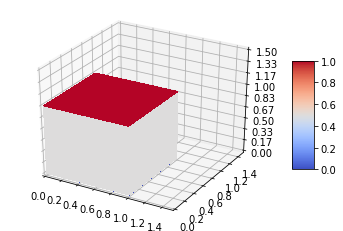

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)
ax.set_zlim(0, 1.5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
